## Ejercicio con Python sobre tiro parabólico

En este ejercicio usaremos un sencillo _script_ para graficar la trayectoria de un proyectil tomando en cuenta la resistencia del aire. También calcularemos el rango del proyectil.

La resistencia del aire, $F_d$, en $N$, es aproximada con la siguiente relación: 

  $$ F_d = C_d v^2 $$

Donde $v$ es la rapidez en $m/s$ y $C_d$ es el coeficiente de arrastre.

A continuación se presenta una guía paso a paso para escribir el _script_ mencionado. Algunas partes se han dejado fuera para ser completadas por el lector.

### Definición de parámetros

Primero debemos importar los módulos necesarios para hacer los cálculos: numpy provee algunas funciones matemáticas, matplotlib provee las herramientas para graficar.

Los parámetros del problema a definirse son:

- masa del proyectil
- aceleración debida a la gravedad
- velocidad inicial (magnitud y dirección)
- coefficiente de arrastre

También se determina el intervalo de tiempo para dibujar la trayectoria del proyectil durante su viaje.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#% matplotlib inline

# Parámetros del modelo
M = 1.0          # Masa del proyectil en kg
g = 9.8          # Gravedad (m/s^2)
V = 80           # Velocidad inicial en m/s
ang = 60.0       # Ángulo de la velocidad inicial, en grados sexagesimales
Cd = 0.005       # Coeficiente de arrastre
dt = 0.5         # Intervalo temporal para dibujar trayectoria

# Podemos revisar las variables desplegándolas. Por ejemplo:
print (V, ang)

80 60.0


### Configuración de las variables en $t=0$

Generaremos la velocidad como una función del tiempo. Para ello, creamos las siguientes listas de datos:

- Valores del tiempo $t$
- Valores del componente _x_ de la velocidad $v_x$
- Valores del componente _y_ de la velocidad $v_y$
- Valores del componente _x_ de la aceleración $a_x$
- Valores del componente _y_ de la aceleración $a_y$

Comenzamos asignando los componentes de la velocidad inicial en $t=0$: $v_x = V \cos\theta$ y $v_y = V \sin\theta$.

Para obtener la aceleración necesitamos la fuerza resultante, que depende del peso $W$ y el arrastre del aire $F_d$:

$$ W = M g$$ 

y 

$$ F_d = C_d v^2 $$

Los componentes _x, y_ de la fuerza resultante son dados por:

$$ F_x = - F_d \cos\theta \qquad \text{y} \qquad F_y = -Mg - F_d \sin\theta $$

donde $\theta$ es el ángulo que la velocidad forma con el eje _x_ positivo. Los componentes de la fuerza siguen la convención de ser positivos cuando apuntan hacia arriba y a la derecha.

Gracias a la segunda ley de Newton, la aceleración del proyectil es dada por:

$$ a_x = - (F_d \cos\theta)/M \qquad \text{y} \qquad a_y = -g - (F_d \sin\theta)/M $$

Implementaremos estos pasos para obtener la velocidad, la fuerza de arrastre y la aceleración en $t=0$.


In [2]:
# Crear e inicializar las listas para almacenar los valores de tiempo y velocidad
t = [0]                         # lista para llevar registro del tiempo
vx = [V*np.cos(ang/180*np.pi)]  # listas para los componentes x e y de la velocidad
vy = [V*np.sin(ang/180*np.pi)]

# Fuerza de arrastre
drag = Cd*V**2

# Listas para los componentes de la aceleración
ax = [-(drag*np.cos(ang/180*np.pi))/M]        
ay = [-g-(drag*np.sin(ang/180*np.pi)/M)]

# Revisar los valores mostrándolos en pantalla
print(ax[0])
print(ay[0])
print(vx[0])
print(vy[0])

-16.000000000000004
-37.51281292110204
40.00000000000001
69.28203230275508


### Actualización de la velocidad conforme pasa el tiempo

Para obtener el siguiente dato de velocidad usamos la siguiente aproximación:

$$ a(t_{n}) = \frac{dv(t_{n})}{dt} \approx \frac{v(t_{n+1}) - v(t_n)}{\Delta t} $$

o 

$$ v(t_{n+1}) \approx v(t_n) +  a(t_n) \Delta t $$

Esta es una manera muy primitiva de integrar la aceleración para obtener la velocidad. Esto se conoce como el método de Euler, en la literatura.

Calculemos las velocidades a lo largo de 10 "pasos" sobre el tiempo.

t= [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
vx= [40.00000000000001, 32.00000000000001, 27.528951416567008, 24.787883378136915, 23.02339491459251, 21.846818145611152, 21.027776019653995, 20.413445666052425, 19.89116281938412, 19.368416481078107, 18.760291921319446]


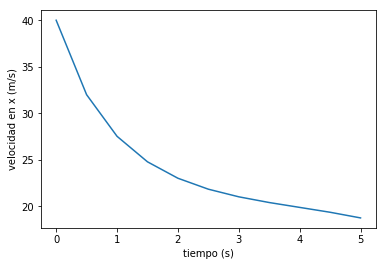

In [3]:
# Uso del método de Euler para actualizar las variables
counter = 0
while (counter < 10):
    t.append(t[counter]+dt)                # incrementar en dt y añadir a la lista de datos de tiempo 
    vx.append(vx[counter]+dt*ax[counter])  # Actualizar la velocidad
    vy.append(vy[counter]+dt*ay[counter])  

    # Con la nueva velocidad se calculan:
    vel = np.sqrt(vx[counter+1]**2 + vy[counter+1]**2)   # rapidez
    drag = Cd*vel**2                                   # fuerza de arrastre
    ax.append(-(drag*np.cos(ang/180*np.pi))/M)     
    ay.append(-g-(drag*np.sin(ang/180*np.pi)/M))
    
    # Incrementar el contador
    counter = counter +1

# Revisión de los valores mediante despliegue
print ("t=", t)
print ("vx=", vx)

# Gráfica de velocidad contra tiempo
plt.plot(t,vx)
plt.ylabel("velocidad en x (m/s)")
plt.xlabel("tiempo (s)")
plt.show()




### Actualización de posiciones

Con las velocidades calculadas, podemos obtener las posiciones sobre $x$ e $y$.

$$ v_x(t_{n}) = \frac{dx(t_{n})}{dt} \approx \frac{x(t_{n+1}) - x(t_n)}{\Delta t} 
   \qquad \text{y} \qquad 
   v_y(t_{n}) = \frac{dy(t_{n})}{dt} \approx \frac{y(t_{n+1}) - y(t_n)}{\Delta t}
$$

o 

$$ x(t_{n+1}) \approx x(t_n) +  v_x(t_n) \Delta t 
   \qquad \text{y} \qquad 
   y(t_{n+1}) \approx y(t_n) +  v_y(t_n) \Delta t 
$$

Comenzando con $x=0$ e $y=0$ en $t=0$, podemos usar el método de Euler para obtener las posiciones para los primeros 10 "pasos" sobre el tiempo, usando las velocidades halladas anteriormente.

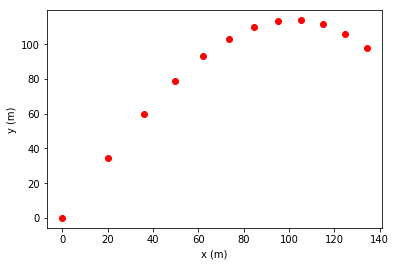

Distancia recorrida por proyectil fue 134.3 m


In [5]:
# Inicializar las listas para posiciones en x e y
x = [0]
y = [0]

# Usar el método de Euler para actualizar variables
counter = 0
while (counter <= 10):
    # Actualizar posiciones en x e y
    x.append(x[counter]+dt*vx[counter])    
    y.append(y[counter]+dt*vy[counter])    
    # Incremento del contador
    counter = counter +1


# Gráfica de la trayectoria
plt.plot(x,y,'ro')
plt.ylabel("y (m)")
plt.xlabel("x (m)")
plt.show()
print ("Distancia recorrida por proyectil fue {:3.1f} m".format(x[counter]))

### ¿Qué tan lejos puede llegar el proyectil?

Intenta modificar la velocidad inicial del proyectil y el coeficiente de arrastre, para notar cómo cambia la trayectoria.

Manteniendo la rapidez inicial fija, encuentra el ángulo que permitirá al proyectil llegar más lejos, dado un coeficiente de arrastre específico.